# Practicum 5
*Day and Night Image Classification*

In this experiment we will try to classify two image labels, namely day and night. This experiment will give you experience in carrying out data pre-processing, feature extraction, and classification using a simple classifier and SVM.

## Import Libraries

In [120]:
# import the necessary packages
from pathlib import Path
import  matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import random
import numpy as np
import pandas as pd

## Path to Images directory


In [121]:
# Path to training and test images
train_dir = 'Data/images/training/'
test_dir = 'Data/images/test/'

## Load and Display Images

In [122]:
# create function to load images
def load_dataset(img_dir):
    # path is a pathlib object that contains the path to the images
    path = Path(img_dir)
    # dirs is a generator object that contains the subdirectories in the path
    # path.glob('*') returns all the files and directories in the path
    dirs = path.glob('*')
    
    # img_list is a list that will contain the images and their labels
    img_list = []
    
    # iterate through the subdirectories
    for dir in dirs:
        # str(dir) converts the path object to a string
        # str(dir).split('/')[-1] splits the string at the '/' character 
        # and returns the last element
        # this is the label of the image
        # e.g. 'day' or 'night'
        label = str(dir).split('/')[-1]
        # iterate through the files in the subdirectory
        # dir.glob('*.jpg') returns all the files in the subdirectory that 
        # end with '.jpg'
        for file in dir.glob('*.jpg'):
            # load the image using matplotlib.image.imread
            img = mpimg.imread(file)
            # if the image is not None, 
            # add it to the img_list along with its label
            # if the image is None, it means the file is not an image
            # and we can ignore it
            if not img is None:
                # append the image and its label to the img_list
                img_list.append((img, label))
    return img_list

# load the training images
train_img = load_dataset(train_dir)

# Check one of the data on the list.  
# The list must contain a tuple with two data,
# namely image data and image labels. 
# It should be a tuple consist of arrays of image and image labels
print(f'Image value: {train_img[0]}')

# check the size image randomly
pick_random = np.random.randint(0, len(train_img))
# check img size
print(f'\nImage: {pick_random}')
print(f'Image size: {train_img[pick_random][0].shape}')

# create a function to display images
def random_img_viz(img_list):
    # pick a random number from 0 to the length of the img_list
    random_number = np.random.randint(0, len(img_list))
    # pick a random image and its label
    img = img_list[random_number][0]
    label = img_list[random_number][1]
    
    # display the image
    plt.imshow(img)
    # print(f'Shape\t: {img.shape}')
    print(f'Shape\t: {img.shape} => height: {img.shape[0]}, width: {img.shape[1]}, color channel: {img.shape[2]}')
    print(f'Label\t: {label}')

Image value: (array([[[158, 194, 218],
        [158, 194, 218],
        [158, 194, 218],
        ...,
        [176, 209, 228],
        [177, 210, 229],
        [177, 210, 229]],

       [[158, 194, 218],
        [158, 194, 218],
        [158, 194, 218],
        ...,
        [180, 213, 232],
        [180, 213, 232],
        [180, 213, 232]],

       [[158, 194, 218],
        [158, 194, 218],
        [158, 194, 218],
        ...,
        [177, 210, 229],
        [177, 210, 229],
        [177, 210, 229]],

       ...,

       [[ 35,  40,  43],
        [ 38,  43,  46],
        [ 39,  44,  47],
        ...,
        [ 65,  73,  75],
        [ 65,  73,  75],
        [ 65,  73,  75]],

       [[ 36,  41,  44],
        [ 38,  43,  46],
        [ 39,  44,  47],
        ...,
        [ 68,  76,  78],
        [ 68,  76,  78],
        [ 65,  73,  75]],

       [[ 37,  41,  44],
        [ 38,  43,  46],
        [ 39,  44,  47],
        ...,
        [ 68,  76,  78],
        [ 68,  76,  78],
        [ 

### Display Random Image

Shape	: (469, 640, 3) => height: 469, width: 640, color channel: 3
Label	: Data\images\training\night


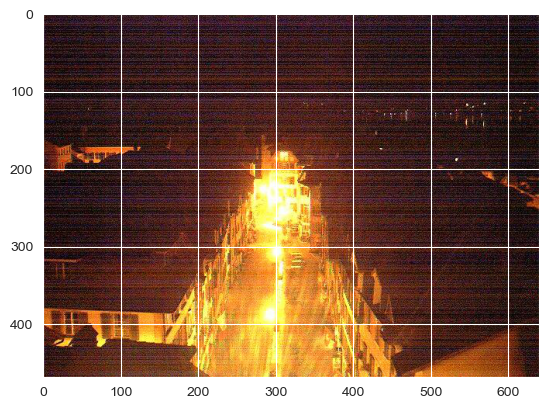

In [123]:
random_img_viz(train_img)

## Preprocessing Images Data

In [124]:
# create a function to standardize the images
# we do this to ensure that all the images are the same size
# because the images are of different sizes
# if not standardized, this will cause an error 
# when we try to train the model
# why? because the input to the model must be the same size
def standardize_input(image):
    # resize the image to width: 1100 and height: 600
    # WARNING! Pay attention to the size (shape) of the image data.
    # The shape attribute will display in 
    # the context of row (height) x column (width) 
    # but in open cv , when we resize the image, width comes first
    std_img = cv2.resize(image, (1100, 600))
    
    return std_img

# create functio to encode the labels
def label_encoder(label):
    # encode the label
    # 'day' => 1
    # 'night' => 0
    
    return 1 if label == 'day' else 0

# create a function to standardize the images and encode the labels
def preprocess(img_list):
    # create an empty list to store the standardized images and labels
    std_img_list = []
    
    # iterate through the images and labels in the img_list
    for item in img_list:
        image = item[0]
        label = item[1]
        
        # standardize the image
        std_img = standardize_input(image)
        # encode the label
        img_label = label_encoder(label)
        
        # append the standardized image and label to the std_img_list
        std_img_list.append((std_img, img_label))
    
    return std_img_list

# preprocess the training images
train_std_img_list = preprocess(train_img)

### Display Random Image Size After Preprocessing

In [134]:
# random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# check img size
print(f'Image: {pick_random}')
print(f'Image size: {train_std_img_list[pick_random][0].shape}')

Image: 25
Image size: (600, 1100, 3)


## Display Random Image After Preprocessing

Shape	: (600, 1100, 3) => height: 600, width: 1100, color channel: 3
Label	: 0


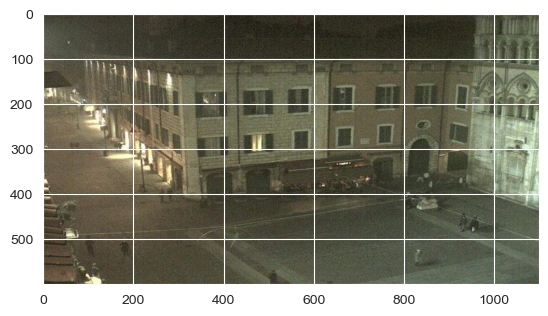

In [135]:
random_img_viz(train_std_img_list)


## Treshold Solution
### Feature Extraction

Next, to be able to differentiate between one label and another, we need a feature. Features are characteristics of data that can be used to differentiate data from each other.
In this experiment, we will use a simple feature, namely the average value of the image brightness level (average brightness). But before we can do that, we will change the color space from RGB to HSV (Hue, Saturation, Value). This is because the brightness level is easier to obtain from HSV based on the value value.


Image: 52
Average brightness: 126.7928


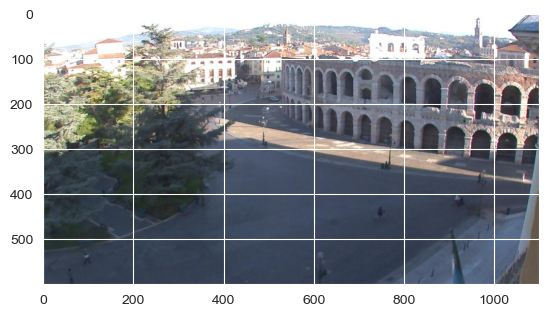

In [136]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    # take the 3rb or index-2 value which is the V channel
    sum_brightness = np.sum(img_hsv[:,:,2]) 
    # calculate the area of the image height x width
    area = image.shape[0] * image.shape[1]
    # calculate the average brightness
    avg = sum_brightness / area

    return avg

# check the average brightness of the image randomly
# remember using image that had been preprocessed
rand_img = np.random.randint(0, len(train_std_img_list))
feature_img = train_std_img_list[rand_img][0]
avg_img = avg_brightness(feature_img)

# display the image
print(f'Image: {rand_img}')
# display the average brightness with 4 decimal places
print(f'Average brightness: {avg_img:.4f}')
plt.imshow(feature_img)

### Treshold Method Classification

Image: 184
Actual Label: 0
Predicted Label: 0


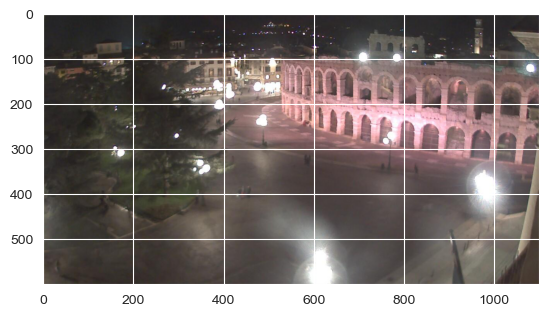

In [137]:
# create a function to classify the images based on the average brightness
def predict_label(img, threshold):
    # compute the average brightness of the image
    avg = avg_brightness(img)
    
    # if the average brightness is greater than the threshold
    # then the image is classified as 'day'
    # otherwise, it is classified as 'night'
    return 1 if avg > threshold else 0

# test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# evaluate
print(f'Image: {rand_img}')
print(f'Actual Label: {train_std_img_list[rand_img][1]}')
print(f'Predicted Label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

## Evaluate the Classifier Manually

In [138]:
# create a function to evaluate the classifier
def evaluate(img_list, threshold):
    # create an empty list to store the predictions
    miss_labels = []
    
    # iterate through the images in the img_list
    for file in img_list:
        # get correct label or ground truth
        img = file[0]
        label = file[1]
        
        # classify the image
        pred_label = predict_label(img, threshold)
        
        # if the predicted label is not equal to the actual label
        # append the image to the miss_label list
        if pred_label != label:
            miss_labels.append((img, pred_label, label))
        
    # count accuracy
    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img
    print(f'Accuracy: {accuracy:.4f}')

# evaluate on the training data
print('Training Data')
evaluate(train_std_img_list, threshold=120)

# evaluate on the test data
# load the test images
test_img = load_dataset(test_dir)
# preprocess the test images
test_std_img_list = preprocess(test_img)
# predict the labels
print('\nTest Data')
evaluate(test_std_img_list, threshold=120)

Training Data
Accuracy: 0.6583

Test Data
Accuracy: 0.6062



## SVM Solution
### Feature Vectors

In [139]:
# create a function to extract the features for every image
# and stored in tabular format, because data stored in Pandas DataFrame
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []
    
    # iterate through the images in the img_list
    # and extract the average brightness of each image
    # and store it in the avg_list
    # also store the labels in the labels list
    # the labels are encoded as 1 for 'day' and 0 for 'night'
    for img in img_list:
        img_avg = avg_brightness(img[0])
        img_label = img[1]
        
        avg_list.append(img_avg)
        labels.append(img_label)
    
    # stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # create a pandas DataFrame
    return pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

### Check Train data

In [140]:
# check function in training data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape of training data: {train_avg_img.shape}')
train_avg_img.head()

Shape of training data: (240, 2)


,AVG_BRIGHT,LABELS
0,175.129871,0.0
1,192.954773,0.0
2,132.141432,0.0
3,199.784797,0.0
4,109.964702,0.0


### check function in test data

In [141]:
# check function in test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape of test data: {test_avg_img.shape}')
test_avg_img.head()

Shape of test data: (160, 2)


,AVG_BRIGHT,LABELS
0,194.267453,0.0
1,157.844245,0.0
2,201.646592,0.0
3,191.273192,0.0
4,188.152729,0.0


### SVC with RBF Kernel for Model

In [143]:
# import the necessary packages
from sklearn.svm import SVC

# split the data into features and labels
X_train = train_avg_img.iloc[:, 0].values.reshape(-1, 1)
y_train = train_avg_img.iloc[:, 1]
X_test = test_avg_img.iloc[:, 0].values.reshape(-1, 1)
y_test = test_avg_img.iloc[:, 1]

import numpy as np

# Jika y_train hanya memiliki 0, tambahkan dummy labels untuk percobaan
if len(set(y_train)) == 1:
    y_train = np.array([0, 1] * (len(X_train) // 2))[:len(X_train)]
    
# Lakukan hal yang sama untuk y_test jika diperlukan
if len(set(y_test)) == 1:
    y_test = np.array([0, 1] * (len(X_test) // 2))[:len(X_test)]

# create the model
model = SVC()
model.fit(X_train, y_train)

SVC()

### Evaluate the Model

In [144]:
# import the necessary packages
from sklearn.metrics import accuracy_score

# make prediction on train data
y_pred_train = model.predict(X_train)
# evaluate the model on train data
accuracy_train = accuracy_score(y_train, y_pred_train)

# make prediction on test data
y_pred_test = model.predict(X_test)
# evaluate the model on test data
accuracy_test = accuracy_score(y_test, y_pred_test)

# show evaluation result
print(f'Train Accuracy: {accuracy_train:.4f}')
print(f'Test Accuracy: {accuracy_test:.4f}')


Train Accuracy: 0.5375
Test Accuracy: 0.5625
